In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("/Users/wl/Desktop/UCB/Data X/Project/Datasets/newData2.csv", index_col=0)
data.head()

,Unnamed: 0.1,Unnamed: 0.1.1,ID,Birth Year,Gender Flag,Skillset1 Weight,Skillset2 Weight,City of profile,Country of profile,Education,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
0,0,0,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,...,0,0,0,0,0,0,1,0,0,0
1,1,1,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,...,0,0,0,0,0,0,1,0,0,0
2,2,2,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,...,0,0,0,0,0,0,1,0,0,0
3,3,3,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,...,0,0,0,0,0,0,1,0,0,0
4,4,4,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,0.874223,0.075843,NaN,United States,4,...,0,0,0,0,0,0,1,0,0,0


In [3]:
#data['Gender Flag'] = data['Gender Flag'].replace({0: 'unknown', 1: 'female', 2: 'male'})
#data['Education'] = data['Education'].replace({0: 'unknown', 1: 'High School', 2: 'Vocational degree', 3: 'Associates', 
#                                               4: 'Bachelors', 5:'Masters', 6: 'MBA', 7: 'PhD'})
#data['Length'] = data['Length']*1/30
# Categorize length in 1:'0-6 months', 2:'6-12 months', 3:'12-18 months', 4:'18-24 months', 5:'more than 2 years'
#data['Length']=pd.cut(data['Length'], bins=[0, 6, 12, 18,24,1000000], 
#                                             include_lowest=True, 
#                                             labels=['<6mo','6-12mo','12-18mo','12-24mo','>24mo'])

# Convert Birthyear to Age in 1:'> 45 yrs old', 2:'36-45 yrs old', 3:'26-35 yrs old', 4:'< 26 yrs old'
#data['Age']=pd.cut(data['Age'], bins=[0, 25, 35, 45, 100000], 
#                                             include_lowest=True, 
#                                             labels=['>45 yrs old','36-45 yrs old','26-35 yrs old','<26 yrs old'])



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110082 entries, 0 to 110081
Data columns (total 87 columns):
Unnamed: 0.1                               110082 non-null int64
Unnamed: 0.1.1                             110082 non-null int64
ID                                         110082 non-null object
Birth Year                                 110082 non-null int64
Gender Flag                                110082 non-null int64
Skillset1 Weight                           110082 non-null float64
Skillset2 Weight                           110082 non-null float64
City of profile                            99845 non-null object
Country of profile                         110082 non-null object
Education                                  110082 non-null int64
Elite Institution                          110082 non-null int64
Start Date                                 110082 non-null object
End Date                                   110082 non-null object
Length                              

In [6]:
data = data.drop(['Unnamed: 0.1','Unnamed: 0.1.1'],axis = 1)

In [7]:
data['Industry'].unique()

array(['Manufacturing', 'Tech', 'Finance', 'Consumer', 'Healthcare',
       'Transportation'], dtype=object)

In [75]:
# split dataset according to Industry
dataTech = data[data['Industry']=='Tech']
print('The shape of tech data: ',dataTech.shape)
dataFin = data[data['Industry']=='Finance']
print('The shape of finance data: ',dataFin.shape)
dataCon = data[data['Industry']=='Consumer']
print('The shape of consumer data: ',dataCon.shape)
dataHealth = data[data['Industry']=='Healthcare']
print('The shape of healthcare data: ',dataHealth.shape)
dataManu = data[data['Industry']=='Manufacturing']
print('The shape of transportation data: ',dataTrans.shape)

The shape of tech data:  (30088, 85)
The shape of finance data:  (6889, 85)
The shape of consumer data:  (14015, 85)
The shape of healthcare data:  (11690, 85)
The shape of transportation data:  (930, 85)


In [9]:
data['Gender Flag']

0         2
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        1
22        1
23        1
24        2
25        2
26        2
27        0
28        0
29        2
         ..
110052    2
110053    2
110054    0
110055    0
110056    1
110057    1
110058    1
110059    1
110060    2
110061    2
110062    1
110063    2
110064    2
110065    2
110066    2
110067    2
110068    2
110069    0
110070    2
110071    2
110072    2
110073    2
110074    2
110075    2
110076    2
110077    2
110078    2
110079    2
110080    2
110081    0
Name: Gender Flag, Length: 110082, dtype: int64

In [13]:
# type(dataTech['Gender Flag'][0])

Text(0.5, 1.0, 'Transportation')

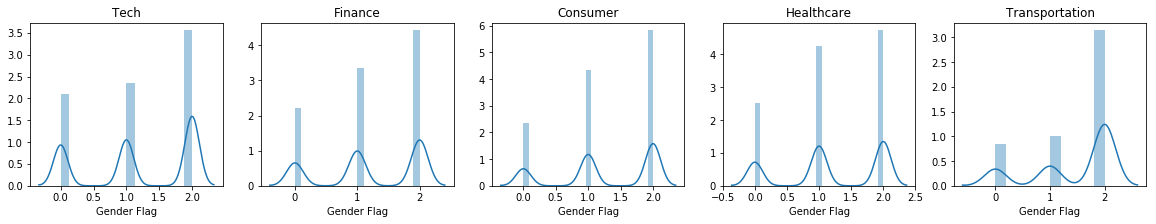

In [14]:
# distribution of gender
fig, axs = plt.subplots(ncols=5,figsize=(20,3))
sns.distplot(dataTech['Gender Flag'], ax=axs[0]).set_title('Tech')
sns.distplot(dataFin['Gender Flag'], ax=axs[1]).set_title('Finance')
sns.distplot(dataCon['Gender Flag'], ax=axs[2]).set_title('Consumer')
sns.distplot(dataHealth['Gender Flag'], ax=axs[3]).set_title('Healthcare')
sns.distplot(dataTrans['Gender Flag'], ax=axs[4]).set_title('Transportation')

Text(0.5, 1.0, 'Transportation')

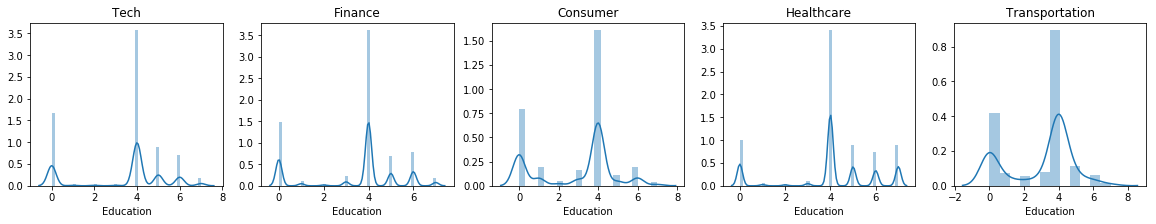

In [15]:
# distribution of education
fig, axs = plt.subplots(ncols=5,figsize=(20,3))
sns.distplot(dataTech['Education'], ax=axs[0]).set_title('Tech')
sns.distplot(dataFin['Education'], ax=axs[1]).set_title('Finance')
sns.distplot(dataCon['Education'], ax=axs[2]).set_title('Consumer')
sns.distplot(dataHealth['Education'], ax=axs[3]).set_title('Healthcare')
sns.distplot(dataTrans['Education'], ax=axs[4]).set_title('Transportation')

Text(0.5, 1.0, 'Transportation')

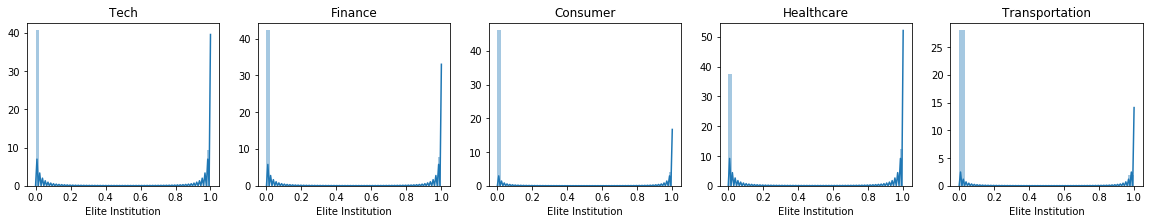

In [16]:
# distribution of Elite institution
fig, axs = plt.subplots(ncols=5,figsize=(20,3))
sns.distplot(dataTech['Elite Institution'], ax=axs[0]).set_title('Tech')
sns.distplot(dataFin['Elite Institution'], ax=axs[1]).set_title('Finance')
sns.distplot(dataCon['Elite Institution'], ax=axs[2]).set_title('Consumer')
sns.distplot(dataHealth['Elite Institution'], ax=axs[3]).set_title('Healthcare')
sns.distplot(dataTrans['Elite Institution'], ax=axs[4]).set_title('Transportation')

Text(0.5, 1.0, 'Transportation')

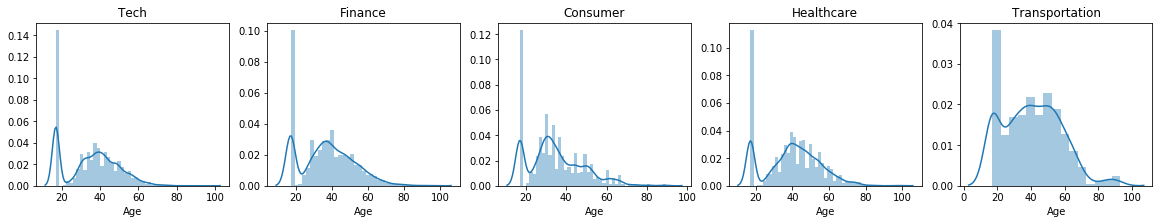

In [17]:
# distribution of age
fig, axs = plt.subplots(ncols=5,figsize=(20,3))
sns.distplot(dataTech['Age'], ax=axs[0]).set_title('Tech')
sns.distplot(dataFin['Age'], ax=axs[1]).set_title('Finance')
sns.distplot(dataCon['Age'], ax=axs[2]).set_title('Consumer')
sns.distplot(dataHealth['Age'], ax=axs[3]).set_title('Healthcare')
sns.distplot(dataTrans['Age'], ax=axs[4]).set_title('Transportation')

In [18]:
# check if the dataset is balanced
print("number of laidoff people in tech:",len(dataTech[dataTech['laid_off']==1]))
print("number of non-laidoff people in tech:",len(dataTech[dataTech['laid_off']==0]))
print("number of laidoff people in finance:",len(dataFin[dataFin['laid_off']==1]))
print("number of non-laidoff people in finance:",len(dataFin[dataFin['laid_off']==0]))
print("number of laidoff people in consumer:",len(dataCon[dataCon['laid_off']==1]))
print("number of non-laidoff people in consumer:",len(dataCon[dataCon['laid_off']==0]))
print("number of laidoff people in healthcare:",len(dataHealth[dataHealth['laid_off']==1]))
print("number of non-laidoff people in healthcare:",len(dataHealth[dataHealth['laid_off']==0]))
print("number of laidoff people in transportation:",len(dataTrans[dataTrans['laid_off']==1]))
print("number of non-laidoff people in transportation:",len(dataTrans[dataTrans['laid_off']==0]))


number of laidoff people in tech: 2492
number of non-laidoff people in tech: 27596
number of laidoff people in finance: 376
number of non-laidoff people in finance: 6513
number of laidoff people in consumer: 1140
number of non-laidoff people in consumer: 12875
number of laidoff people in healthcare: 326
number of non-laidoff people in healthcare: 11364
number of laidoff people in transportation: 46
number of non-laidoff people in transportation: 884


In [19]:
type(data['Skillset1 Weight'][0])

numpy.float64

## Tech

In [20]:
# make balanced data
not_laid_off_tech = dataTech[dataTech['laid_off'] == 0]
laid_off_tech = dataTech[dataTech['laid_off'] == 1]
np.random.seed(101)
not_laid_off_tech = not_laid_off_tech.sample(n=7500) 
dataTech = pd.concat([not_laid_off_tech, laid_off_tech])

In [21]:
print(len(dataTech[dataTech['laid_off']==1]))
print(len(dataTech[dataTech['laid_off']==0]))

2492
7500


In [22]:
from sklearn.model_selection import train_test_split
# Reserve 20% for testing
y = dataTech['laid_off']
X = dataTech.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 7993 observation with 70 features
test data has 1999 observation with 70 features


In [23]:
# Scale the data, using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Random forest to see feature importance
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_test,y_test)

0.8579289644822411

In [25]:
# hypermarameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [26]:
# best number of trees
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

print_grid_search_metrics(Grid_RF)

Best score: 0.832
Best parameters set:
	n_estimators: 60


In [27]:
# feature importance
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset2 Weight: 0.2068
Skillset1 Weight: 0.1868
Age: 0.1526
Education: 0.0625
Gender Flag: 0.0512
Elite Institution: 0.0247
s2-Sales: 0.0174
s1-Electrical Engineering: 0.0148
s1-Sales: 0.014
s2-Administration: 0.0122
s2-Software Engineering: 0.0102
s1-Software Engineering: 0.0101
s1-Finance: 0.0093
s2-Business Development: 0.0092
s1-Human Resources: 0.0091
s2-IT Management and Support: 0.0088
s1-Product Management: 0.0087
s2-Human Resources: 0.0086
s2-Product Management: 0.0084
s1-Web Design: 0.0083
s1-IT Management and Support: 0.0083
s1-Administration: 0.0082
s1-Digital Marketing: 0.0081
s2-Finance: 0.008
s2-Web Development: 0.0069
s2-Data Analysis: 0.0069
s2-Social Media and Communications: 0.0066
s2-Digital Marketing: 0.0064
s2-Operations Management: 0.0062
s2-Electrical Engineering: 0.006
s2-Web Design: 0.0058
s1-Web Development: 0.005
s1-Operations Management: 0.0048
s2-Manufacturing and Process Management: 0.0045
s2-Logistics:

###  for tech industry, Age > Education> Gender Flag> Elite Institution

In [28]:
# Lasso regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7573786893446723

In [29]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print_grid_search_metrics(Grid_LR)

Best score: 0.754
Best parameters set:
	C: 1
	penalty: 'l1'


In [31]:
best_LR_model = Grid_LR.best_estimator_

In [32]:
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X)
best_LR_model.fit(X_l1, y)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
s1-Sales: -0.2212
s1-Electrical Engineering: 0.2032
Skillset1 Weight: -0.1848
Age: -0.1779
Education: 0.1399
s1-Product Management: -0.1221
s1-Operations Management: -0.1088
s2-Military: -0.1019
Skillset2 Weight: -0.1015
s1-Software Engineering: 0.0939
s2-Energy, Oil, and Gas: -0.0925
s2-Retail and Fashion: 0.091
s1-Web Development: 0.0884
s2-Product Management: -0.0798
s2-Non-Profit and Community: 0.0702
s2-Data Analysis: 0.0695
s2-Electrical Engineering: 0.0682
s2-Hospitality: -0.0646
s1-Mobile Telecommunications: 0.0622
s1-Finance: -0.0612
s2-Web Development: 0.0523
s2-Human Resources: 0.0521
s2-Digital Marketing: -0.0477
s1-Retail and Fashion: -0.0468
s1-Data Analysis: 0.0467
s2-Software Engineering: 0.0441
s2-Manufacturing and Process Management: 0.0438
s1-Legal: 0.0391
s1-Insurance: 0.0389
s1-Non-Profit and Community: -0.0371
s2-Logistics: -0.037
s1-Real Estate: -0.0368
s2-Video and Film Production: 0.0363
s2-Insurance: 0.0337
s1-Digital Mark

In [33]:
best_LR_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = best_LR_model.predict_proba(X_test)
best_LR_model.score(X_test, y_test)

0.7573786893446723

In [35]:
from sklearn.metrics import classification_report
y_true = y_test 
y_pred = best_LR_model.predict(X_test)
target_names = ['non-laid_off', 'laid_off']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-laid_off       0.76      0.98      0.86      1508
    laid_off       0.55      0.07      0.12       491

   micro avg       0.76      0.76      0.76      1999
   macro avg       0.66      0.52      0.49      1999
weighted avg       0.71      0.76      0.68      1999



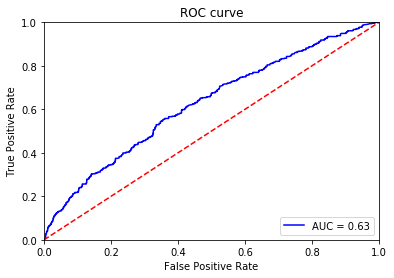

In [36]:
from sklearn.metrics import roc_curve,auc
prob = best_LR_model.predict_proba(X_test)
pred = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.title("ROC curve")
plt.plot(fpr,tpr,'b',label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
# naive bayes
#from sklearn.naive_bayes import GaussianNB
#nb = GaussianNB()
#nb.fit(X_train, y_train)
#nb.score(X_test,y_test)

In [40]:
#nb.fit(X_l1, y)
#nb.coef_[0]
#print ("Naive Bayes Coefficients")
#for k,v in sorted(zip(map(lambda x: round(x, 4), nb.coef_[0]), \
                      #X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    #print (v + ": " + str(k))

## Consumers

In [41]:
not_laid_off_con = dataCon[dataCon['laid_off'] == 0]
laid_off_con = dataCon[dataCon['laid_off'] == 1]
np.random.seed(101)
not_laid_off_con = not_laid_off_con.sample(n=5000) 
dataCon = pd.concat([not_laid_off_con, laid_off_con])

In [42]:
print(len(dataCon[dataCon['laid_off']==1]))
print(len(dataCon[dataCon['laid_off']==0]))

1140
5000


In [43]:
from sklearn import model_selection
# Reserve 20% for testing
y1 = dataCon['laid_off']
X1 = dataCon.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date'],axis = 1)
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X1_train.shape)
print('test data has %d observation with %d features'% X1_test.shape)

training data has 4912 observation with 71 features
test data has 1228 observation with 71 features


In [44]:
# Scale the data, using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [45]:
# Random forest to see feature importance
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X1_train, y1_train)
RF.score(X1_test,y1_test)

0.9014657980456026

In [46]:
# hypermarameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [47]:
# best number of trees
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

print_grid_search_metrics(Grid_RF)

Best score: 0.909
Best parameters set:
	n_estimators: 40


In [48]:
# feature importance
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset1 Weight: 0.1489
Skillset2 Weight: 0.1484
Age: 0.1262
s1-Administration: 0.117
Education: 0.0667
Gender Flag: 0.0369
s2-Business Development: 0.0209
s1-Business Development: 0.0187
s2-Sales: 0.0148
s1-IT Management and Support: 0.014
s1-Data Analysis: 0.0134
s1-Sales: 0.0125
s2-IT Management and Support: 0.0119
s2-Data Analysis: 0.0119
Elite Institution: 0.0114
s2-Social Media and Communications: 0.0107
s2-Digital Marketing: 0.0091
s1-Software Engineering: 0.0086
s2-Design: 0.0082
s2-Video and Film Production: 0.008
s1-Public Policy: 0.0071
s1-Video and Film Production: 0.0067
s1-Manufacturing and Process Management: 0.0067
s1-Social Media and Communications: 0.0065
s2-Software Engineering: 0.0063
s2-Public Policy: 0.0061
s2-Hospitality: 0.006
s2-Electrical Engineering: 0.0059
s1-Electrical Engineering: 0.0059
s1-Energy, Oil, and Gas: 0.0058
s1-Hospitality: 0.0055
s1-Design: 0.0052
s2-Manufacturing and Process Management: 0.004

### For Consumer Products industry, Age > s1-Administration >Education> Gender

In [49]:
# Lasso regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X1_train, y1_train)
LR.score(X1_test, y1_test)

0.8200325732899023

In [50]:
# hyperparameter tuning
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
print_grid_search_metrics(Grid_LR)

Best score: 0.815
Best parameters set:
	C: 5
	penalty: 'l1'


In [52]:
best_LR_model.fit(X1_train, y1_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X1)
best_LR_model.fit(X_l2, y1)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
s1-Administration: -0.32
s1-Product Management: 0.1764
s1-Industrial Management: -0.1715
s1-Business Development: 0.1575
s2-Web Design: -0.1327
s2-Logistics: 0.1321
s1-Electrical Engineering: 0.1285
Education: 0.128
s2-Operations Management: -0.1276
s2-Military: -0.1203
Gender Flag: -0.1196
s1-Public Policy: 0.1187
s2-Energy, Oil, and Gas: 0.1187
s2-Retail and Fashion: -0.1182
s1-Energy, Oil, and Gas: 0.1172
s2-Business Development: 0.1166
s2-Data Analysis: -0.1098
s1-Non-Profit and Community: -0.1077
Skillset2 Weight: 0.1062
s1-Healthcare: -0.0937
s1-Video and Film Production: 0.0918
s2-Manufacturing and Process Management: 0.0866
s2-Hospitality: 0.0865
s1-Design: 0.0818
s2-Healthcare: 0.0805
s2-Software Engineering: -0.0796
s1-Software Engineering: 0.0751
s2-Product Management: -0.0733
Elite Institution: 0.0703
s2-Social Media and Communications: -0.069
s1-Legal: -0.0626
s1-Logistics: 0.0603
s2-Industrial Management: -0.0602
s1-Web Development: -

In [54]:
y_pred = best_LR_model.predict_proba(X1_test)
best_LR_model.score(X1_test, y1_test)

0.8249185667752443

In [55]:
from sklearn.metrics import classification_report
y1_true = y1_test 
y1_pred = best_LR_model.predict(X1_test)
target_names = ['non-laid_off', 'laid_off']
print(classification_report(y1_true, y1_pred, target_names=target_names))

              precision    recall  f1-score   support

non-laid_off       0.83      0.99      0.90      1012
    laid_off       0.52      0.06      0.10       216

   micro avg       0.82      0.82      0.82      1228
   macro avg       0.68      0.52      0.50      1228
weighted avg       0.78      0.82      0.76      1228



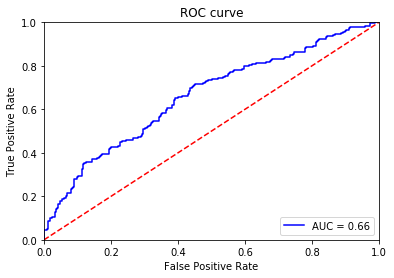

In [56]:
from sklearn.metrics import roc_curve,auc
prob = best_LR_model.predict_proba(X1_test)
pred = prob[:,1]
fpr, tpr, threshold = roc_curve(y1_test, pred)
roc_auc = auc(fpr, tpr)

plt.title("ROC curve")
plt.plot(fpr,tpr,'b',label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Healthcare

In [57]:
not_laid_off_Health = dataHealth[dataHealth['laid_off'] == 0]
laid_off_Health = dataHealth[dataHealth['laid_off'] == 1]
np.random.seed(101)
not_laid_off_Health = not_laid_off_Health.sample(n=700) 
dataHealth = pd.concat([not_laid_off_Health, laid_off_Health])

In [58]:
print(len(dataHealth[dataHealth['laid_off']==1]))
print(len(dataHealth[dataHealth['laid_off']==0]))

326
700


In [59]:
from sklearn import model_selection
y2 = dataHealth['laid_off']
X2 = dataHealth.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected'],axis = 1)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 7993 observation with 70 features
test data has 1999 observation with 70 features


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X2_train, y2_train)
RF.score(X2_test,y2_test)

0.7184466019417476

In [62]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X2_train, y2_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [63]:
print_grid_search_metrics(Grid_RF)

Best score: 0.691
Best parameters set:
	n_estimators: 80


In [64]:
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset1 Weight: 0.1729
Skillset2 Weight: 0.158
Age: 0.1365
Education: 0.0664
Gender Flag: 0.0495
s1-Healthcare: 0.0261
Elite Institution: 0.0223
s2-Healthcare: 0.02
s2-Electrical Engineering: 0.0199
s2-Web Development: 0.0175
s2-Administration: 0.017
s2-Business Development: 0.0144
s1-Business Development: 0.0143
s1-Product Management: 0.0138
s2-Human Resources: 0.0133
s2-Sales: 0.0127
s2-Manufacturing and Process Management: 0.0114
s1-Manufacturing and Process Management: 0.0114
s1-Finance: 0.0107
s1-Administration: 0.0107
s2-Software Engineering: 0.0105
s1-Software Engineering: 0.0104
s2-Product Management: 0.0098
s2-Design: 0.0098
s2-Industrial Management: 0.0092
s1-Electrical Engineering: 0.0082
s2-Operations Management: 0.008
s1-Data Analysis: 0.0078
s2-Digital Marketing: 0.0077
s1-Human Resources: 0.007
s1-Sales: 0.0069
s2-Finance: 0.0065
s2-Data Analysis: 0.0065
s1-Logistics: 0.0057
s1-Web Design: 0.0054
s1-IT Management and S

### for healthcare industry, Age >Education>Gender >Elite Institution

In [65]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X2_train, y2_train)
LR.score(X2_test, y2_test)

parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X2_train, y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
best_LR_model.fit(X2_train, y2_train)

scaler = StandardScaler()
X_l2 = scaler.fit_transform(X2)
best_LR_model.fit(X_l2, y2)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X2.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
Age: -0.3504
s2-Web Development: 0.3152
s1-Non-Profit and Community: -0.2296
s1-Public Policy: -0.2153
Education: 0.2139
s2-Electrical Engineering: 0.2046
s1-Military: -0.1733
s2-Public Policy: -0.1598
s1-Software Engineering: 0.1567
s1-Energy, Oil, and Gas: -0.1504
Skillset1 Weight: -0.1495
s1-Finance: 0.1387
Skillset2 Weight: -0.1301
s1-Legal: 0.1291
s2-Design: 0.1083
s1-Human Resources: -0.105
s2-Software Engineering: 0.1024
s2-Sales: -0.1006
s1-Operations Management: 0.0954
s1-Mobile Telecommunications: -0.0928
s2-Finance: 0.0896
s1-Web Design: 0.0888
s1-Retail and Fashion: -0.0882
s2-Musical Production: -0.081
s1-Video and Film Production: 0.077
s2-IT Management and Support: 0.0748
s2-Energy, Oil, and Gas: 0.0728
s1-Social Media and Communications: -0.0714
s2-Hospitality: 0.0673
s1-Web Development: 0.0613
s1-Data Analysis: 0.0591
s2-Social Media and Communications: -0.0587
s2-Video and Film Production: 0.0582
s2-Legal: 0.0577
s1-Healthcare: -0

### Finance

In [67]:
not_laid_off_Fin = dataFin[dataFin['laid_off'] == 0]
laid_off_Fin = dataFin[dataFin['laid_off'] == 1]
np.random.seed(101)
not_laid_off_Fin = not_laid_off_Fin.sample(n=700) 
dataFin = pd.concat([not_laid_off_Fin, laid_off_Fin])

In [68]:
from sklearn.model_selection import train_test_split
# Reserve 20% for testing
y3 = dataFin['laid_off']
X3 = dataFin.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected'],axis = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X3_train.shape)
print('test data has %d observation with %d features'% X3_test.shape)

training data has 860 observation with 70 features
test data has 216 observation with 70 features


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X3_train, y3_train)
RF.score(X3_test,y3_test)

0.6527777777777778

In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X3_train, y3_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [72]:
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X3.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset1 Weight: 0.1779
Skillset2 Weight: 0.1728
Age: 0.1641
Education: 0.0639
Gender Flag: 0.0398
Elite Institution: 0.0244
s1-Administration: 0.0241
s1-Finance: 0.0219
s2-Finance: 0.0216
s2-Sales: 0.0208
s2-Administration: 0.0151
s2-Product Management: 0.0138
s1-Sales: 0.0134
s1-Product Management: 0.0125
s2-Human Resources: 0.0109
s2-Real Estate: 0.0107
s1-Human Resources: 0.0098
s2-Data Analysis: 0.0092
s1-Operations Management: 0.0083
s1-Software Engineering: 0.0077
s1-IT Management and Support: 0.0074
s2-Business Development: 0.0073
s2-Retail and Fashion: 0.0069
s2-Insurance: 0.0065
s2-Non-Profit and Community: 0.0061
s1-Retail and Fashion: 0.0061
s2-Social Media and Communications: 0.006
s2-IT Management and Support: 0.006
s2-Software Engineering: 0.0058
s1-Insurance: 0.0058
s1-Web Development: 0.0057
s2-Web Development: 0.0056
s1-Business Development: 0.0054
s2-Operations Management: 0.0051
s1-Legal: 0.005
s2-Logistics: 0.0049

### for finance industry, Age > Education>Gender Flag> s1-Finance> Elite Institution

In [73]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X3_train, y3_train)
LR.score(X3_test, y3_test)

0.6574074074074074

In [74]:
best_LR_model.fit(X3_train, y3_train)

scaler = StandardScaler()
X_l2 = scaler.fit_transform(X3)
best_LR_model.fit(X_l2, y3)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X3.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
Age: -0.4268
s1-Mobile Telecommunications: -0.3919
Skillset1 Weight: -0.3265
Skillset2 Weight: -0.2472
s1-Web Design: 0.2065
s1-Military: 0.1871
s2-Electrical Engineering: 0.1816
s1-Logistics: -0.1812
s1-Energy, Oil, and Gas: -0.1778
s2-Sales: -0.1742
Education: 0.1731
s1-Industrial Management: 0.1559
s1-Musical Production: 0.1395
s2-Design: -0.1389
s1-Healthcare: -0.1381
s2-Musical Production: -0.1245
s1-Human Resources: -0.1231
s2-Military: 0.1193
s1-Non-Profit and Community: -0.1141
s1-Retail and Fashion: 0.1064
s1-Operations Management: -0.1048
s2-Operations Management: -0.103
s2-Finance: 0.1002
s2-Insurance: -0.0913
s1-Digital Marketing: -0.0845
s2-Web Design: 0.0803
s2-Software Engineering: 0.0799
s2-Social Media and Communications: -0.0771
s2-Real Estate: -0.075
s1-Software Engineering: 0.0713
s1-Finance: 0.0697
s2-Legal: -0.0688
s2-Manufacturing and Process Management: -0.0676
s2-Retail and Fashion: 0.0661
s1-Video and Film Production: 0.06

### Manufacturing

In [76]:
not_laid_off_Manu = dataManu[dataManu['laid_off'] == 0]
laid_off_Manu = dataManu[dataManu['laid_off'] == 1]
np.random.seed(101)
not_laid_off_Manu = not_laid_off_Manu.sample(n=80) 
dataManu = pd.concat([not_laid_off_Manu, laid_off_Manu])

In [77]:
from sklearn.model_selection import train_test_split
# Reserve 20% for testing
y4 = dataManu['laid_off']
X4 = dataManu.drop(['Length', 'ID','Birth Year','City of profile', 'Country of profile',
                   'Start Date','End Date','Role', 'Dept', 'Company Name',
                   'Location','Industry','laid_off','Layoff Date', 'Employees Affected',],axis = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2,random_state=101)

print('training data has %d observation with %d features'% X4_train.shape)
print('test data has %d observation with %d features'% X4_test.shape)

training data has 2696 observation with 70 features
test data has 675 observation with 70 features


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.transform(X4_test)

In [79]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X4_train, y4_train)
RF.score(X4_test,y4_test)

0.9733333333333334

In [80]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X4_train, y4_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [81]:
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X4.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset1 Weight: 0.246
Skillset2 Weight: 0.2179
Age: 0.1253
Education: 0.0805
Gender Flag: 0.0542
Elite Institution: 0.0191
s2-Sales: 0.0139
s2-IT Management and Support: 0.0134
s1-Administration: 0.0124
s1-Product Management: 0.0115
s1-Electrical Engineering: 0.0114
s1-Software Engineering: 0.011
s2-Software Engineering: 0.0106
s2-Human Resources: 0.0096
s1-Operations Management: 0.0089
s2-Mobile Telecommunications: 0.0088
s2-Public Policy: 0.0085
s1-Finance: 0.0084
s1-IT Management and Support: 0.008
s2-Finance: 0.0078
s1-Sales: 0.0078
s1-Web Design: 0.0073
s2-Healthcare: 0.0068
s2-Administration: 0.0064
s2-Social Media and Communications: 0.0061
s2-Data Analysis: 0.006
s2-Product Management: 0.0059
s1-Hospitality: 0.0057
s2-Operations Management: 0.0055
s2-Web Development: 0.0047
s2-Manufacturing and Process Management: 0.0045
s2-Electrical Engineering: 0.0041
s2-Digital Marketing: 0.0039
s1-Mobile Telecommunications: 0.0039
s1-Leg

### for manufacturing industry, Age> Education> Gender Flag>Elite Institution

In [82]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X4_train, y4_train)
LR.score(X4_test, y4_test)

0.9748148148148148

In [83]:
best_LR_model.fit(X4_train, y4_train)

scaler = StandardScaler()
X_l2 = scaler.fit_transform(X4)
best_LR_model.fit(X_l2, y4)
best_LR_model.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), best_LR_model.coef_[0]), \
                      X4.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
Skillset1 Weight: -0.5153
s1-Web Development: 0.2758
s1-Digital Marketing: 0.2597
s1-Sales: -0.2455
s1-Administration: -0.2389
Skillset2 Weight: -0.228
s1-Manufacturing and Process Management: 0.22
s2-Logistics: 0.2195
Age: -0.2093
s1-Finance: -0.1801
s1-Logistics: 0.1744
s2-Video and Film Production: 0.1717
s1-Video and Film Production: 0.1692
s1-Mobile Telecommunications: 0.1572
s2-Business Development: 0.1452
s1-Legal: 0.1395
s2-Web Development: 0.1371
s1-Operations Management: -0.1288
s1-Product Management: -0.1135
s2-Industrial Management: -0.1104
s2-Human Resources: -0.1059
s2-Non-Profit and Community: 0.1033
s2-Social Media and Communications: -0.1031
s2-Manufacturing and Process Management: 0.1022
s1-Non-Profit and Community: 0.1004
s2-IT Management and Support: -0.1002
s2-Web Design: -0.1
s2-Data Analysis: -0.0986
s2-Public Policy: -0.0965
s1-IT Management and Support: -0.0883
s1-Human Resources: -0.0875
s2-Product Management: 0.0808
s1-He